<a href="https://colab.research.google.com/github/bsaha205/asd/blob/main/ASD_Detection_child.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading dataset
ch = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Child-Data.csv",na_values=['?'])


In [ ]:
#childs
ch.sample(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
67,1,0,0,0,1,0,1,0,0,1,...,m,White-European,no,no,'United Kingdom',no,4,'4-11 years',Parent,NO
84,0,0,1,0,1,1,1,0,1,1,...,m,Asian,no,no,India,no,6,'4-11 years',Parent,NO
44,0,0,0,1,0,0,1,0,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,2,'4-11 years',Parent,NO
100,1,1,0,1,0,1,1,0,1,0,...,f,White-European,yes,yes,'United Kingdom',no,6,'4-11 years',Relative,NO
109,0,0,1,0,1,0,0,0,0,1,...,m,Asian,no,no,Japan,no,3,'4-11 years',Parent,NO


In [ ]:
# Number of tuples and fields
print("childs      :",ch.shape)

childs      : (292, 21)


In [ ]:
#childs
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    int64  
 1   A2_Score         292 non-null    int64  
 2   A3_Score         292 non-null    int64  
 3   A4_Score         292 non-null    int64  
 4   A5_Score         292 non-null    int64  
 5   A6_Score         292 non-null    int64  
 6   A7_Score         292 non-null    int64  
 7   A8_Score         292 non-null    int64  
 8   A9_Score         292 non-null    int64  
 9   A10_Score        292 non-null    int64  
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        249 non-null    object 
 13  jundice          292 non-null    object 
 14  austim           292 non-null    object 
 15  country_of_res   292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result          

In [ ]:
#childs
ch.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [ ]:
#Total number of missing values in each dataset
print("Total no. of missing values in childs's dataset     : ",ch.isnull().sum().sum())

Total no. of missing values in childs's dataset     :  90


In [ ]:
#childs
ch.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


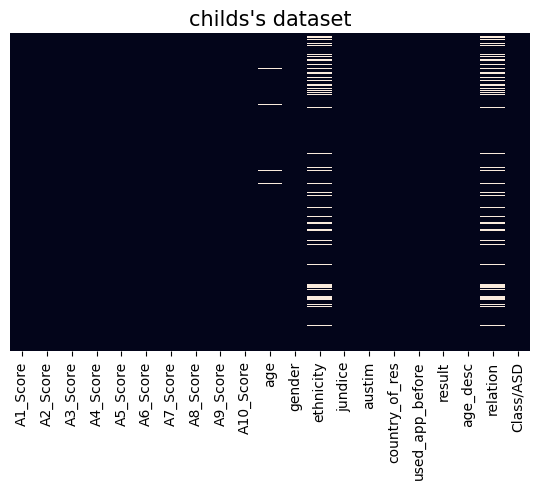

In [ ]:
fig, ax = plt.subplots(figsize=(5.5,5))

sns.heatmap(ch.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax)
ax.set_title("childs's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('heatmap_ch.pdf', transparent=True, dpi=300)

In [ ]:
#ASD or Not
#Check the column names in the dataframe
print(ch.columns)
# Replace 'Class/ASD' with the actual column name from the output above
# The line below previously had 'Class/ASD'. It is being changed to 'Class/ASD Traits '
# based on the output of the print(ch.columns) command. This assumes 'Class/ASD Traits '
# is the intended column. Please verify this against the actual column names printed.
actual_column_name = 'Class/ASD'

print("\nNo of childs diagonised with ASD = ",len(ch[ch[actual_column_name] == 'YES']))
print("No of childs not diagonised with ASD = ",len(ch[ch[actual_column_name] == 'NO']))


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

No of childs diagonised with ASD =  141
No of childs not diagonised with ASD =  151


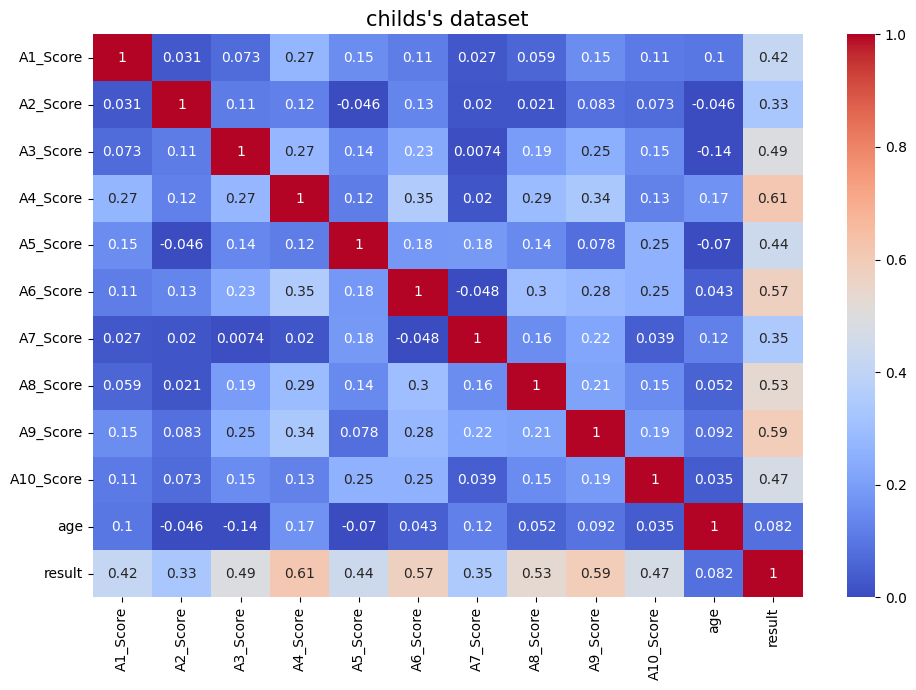

In [ ]:

# Select only numeric columns
numeric_data = ch.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax)
ax.set_title("childs's dataset", fontsize=15)
fig.tight_layout()

# Save the figure
plt.savefig('correlation_ch.pdf', transparent=True, dpi=300)

plt.show()

In [ ]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

ch.ethnicity = imputer_mode.fit_transform(ch.ethnicity.values.reshape(-1,1))[:,0]
ch.relation = imputer_mode.fit_transform(ch.relation.values.reshape(-1,1))[:,0]

#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='mean')
ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]

In [ ]:
print("After imputing,\nNo of missing values in childs's dataset      = ",ch.isnull().sum().sum())

After imputing,
No of missing values in childs's dataset      =  0


In [ ]:
print("Number of duplicate rows:", ch.duplicated().sum())
ch = ch.drop_duplicates()
print("Number of duplicate rows:", ch.duplicated().sum())


Number of duplicate rows: 2
Number of duplicate rows: 0


In [ ]:
#Since age of toddlers are represented in months, age(in years) of childs is converted to age in months.
ch.rename(columns = {'age':'Age_Mons'}, inplace = True)

ch['Age_Mons'] = ch['Age_Mons']*12

### **Model fitting**

*Spliting dependent and independent features*


In [ ]:
shuffled_data = ch.sample(frac=1, random_state=4)

# Separate ASD and non-ASD data
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO']

# Adjust sample size to available data
n_sample = min(151, len(non_ASD_data))  # Take min between 151 and actual count
non_ASD_data = non_ASD_data.sample(n=n_sample, random_state=4)

# Concatenate balanced dataset
ch_balanced = pd.concat([ASD_data, non_ASD_data])

# Shuffle again after balancing
ch_balanced = ch_balanced.sample(frac=1, random_state=4).reset_index(drop=True)

print(ch_balanced['Class/ASD'].value_counts())  # Check distribution


Class/ASD
NO     150
YES    140
Name: count, dtype: int64


In [ ]:
# Split the data into features and target label
raw_target= ch['Class/ASD']
raw_features = ch[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'country_of_res','relation']]

*Feature Scaling*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [ ]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,country_of_res,relation
0,1,1,0,0,1,1,0,1,0,0,0.285714,m,Others,no,no,Jordan,Parent
1,1,1,0,0,1,1,0,1,0,0,0.285714,m,'Middle Eastern ',no,no,Jordan,Parent
2,1,1,0,0,0,1,1,1,0,0,0.285714,m,White-European,no,no,Jordan,Parent
3,0,1,0,0,1,1,0,0,0,1,0.142857,f,White-European,yes,no,Jordan,Parent
4,1,1,1,1,1,1,1,1,1,1,0.142857,m,Others,yes,no,'United States',Parent


##Encoding Categorical variables

In [ ]:
features = pd.get_dummies(features_minmax_transform)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score,
    roc_curve, auc, log_loss, confusion_matrix, roc_auc_score
)
def model_report(y_act, y_pred):
    import numpy as np

    # Convert y_act and y_pred to NumPy arrays if needed
    y_act = np.array(y_act) if isinstance(y_act, list) else y_act
    y_pred = np.array(y_pred) if isinstance(y_pred, list) else y_pred

    # Convert categorical labels ('YES', 'NO') to numeric if needed
    # Changed to check using .iloc[0] to access the first value:
    if isinstance(y_act.iloc[0], str):
        lb = LabelBinarizer()
        y_act = lb.fit_transform(y_act).ravel()
        y_pred = lb.transform(y_pred).ravel()

    # Metrics
    accuracy = accuracy_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    recall = recall_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)
    auc_score = roc_auc_score(y_act, y_pred)
    kappa = cohen_kappa_score(y_act, y_pred)
    logloss = log_loss(y_act, y_pred)
    confusion = confusion_matrix(y_act, y_pred)
    TN, FP, FN, TP = confusion.ravel()
    specificity = TN / (TN + FP)

    # Print Results
    print("\n=== Model Evaluation ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"Cohen’s Kappa: {kappa:.4f}")
    print(f"Log Loss: {logloss:.4f}\n")

In [ ]:
def model_reports(y_act, y_pred):
    import numpy as np
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, cohen_kappa_score, confusion_matrix

    # Convert y_act to NumPy array if not already
    y_act = np.array(y_act) if isinstance(y_act, list) else y_act
    y_pred = np.array(y_pred) if isinstance(y_pred, list) else y_pred

    # Convert categorical labels ('YES', 'NO') to numeric if necessary
    if isinstance(y_act[0], str):
        lb = LabelBinarizer()
        y_act = lb.fit_transform(y_act).ravel()

    # Compute Metrics
    accuracy = accuracy_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    recall = recall_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)

    # Compute confusion matrix for specificity
    conf_matrix = confusion_matrix(y_act, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()
    specificity = TN / (TN + FP)

    # Compute AUC Score
    auc_score = roc_auc_score(y_act, y_pred)

    # Compute Cohen’s Kappa Score
    kappa = cohen_kappa_score(y_act, y_pred)

    # Compute Log Loss
    logloss = log_loss(y_act, y_pred)

    # Print Metrics
    print("\n=== Model Evaluation ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"Cohen’s Kappa: {kappa:.4f}")
    print(f"Log Loss: {logloss:.4f}\n")


In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


##Spliting Data


In [ ]:
X = features
y = target

print('X.shape:', X.shape)
print('y.shape:', y.shape)
print('X:', X)

X.shape: (290, 84)
y.shape: (290,)
X:      A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         0         0         1         1         0   
1           1         1         0         0         1         1         0   
2           1         1         0         0         0         1         1   
3           0         1         0         0         1         1         0   
4           1         1         1         1         1         1         1   
..        ...       ...       ...       ...       ...       ...       ...   
287         1         1         1         1         1         1         1   
288         1         0         0         0         1         0         1   
289         1         0         1         1         1         1         1   
290         1         1         1         0         1         1         1   
291         0         0         1         0         1         0         1   

     A8_Score  A9_Score  A10_Score  .

## Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# One-hot encoding categorical features
features = pd.get_dummies(features_minmax_transform)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(raw_target)

# Train Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, y)

# Select top features based on importance
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Select top `k` features
k = 15  # Adjust as needed
selected_features = features.columns[sorted_indices[:k]]

# Create a DataFrame to store feature names and their importance scores
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Importance Score': feature_importances
})

# Sort by importance score in descending order
feature_scores = feature_scores.sort_values(by='Importance Score', ascending=False)

# Print top k features with their scores
print(feature_scores.head(k))

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# One-hot encoding categorical features
features = pd.get_dummies(features_minmax_transform)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(raw_target)

# Train Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, y)

# Select top features based on importance
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Select top `k` features
k = 15  # Adjust as needed
selected_features = features.columns[sorted_indices[:k]]

# Create a DataFrame to store feature names and their importance scores
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Importance Score': feature_importances
})

# Sort by importance score in descending order
feature_scores = feature_scores.sort_values(by='Importance Score', ascending=False)

# Print top k features with their scores
print(feature_scores.head(k))

actual_selected_features = ["A4_Score",
    "A9_Score","A8_Score", "A1_Score", "A10_Score", "A3_Score",
    "A5_Score", "A6_Score","A7_Score","Age_Mons","A2_Score"]

# Ensure selected features exist in the DataFrame
existing_features = [f for f in actual_selected_features if f in features.columns]

# Initialize X with selected features
X = features[existing_features]
y = ch['Class/ASD']
existing_features = [f for f in actual_selected_features if f in features.columns]

# Initialize X with selected features
X = features[existing_features]
y = ch['Class/ASD']

                            Feature  Importance Score
3                          A4_Score          0.137900
8                          A9_Score          0.096010
7                          A8_Score          0.078809
0                          A1_Score          0.070973
9                         A10_Score          0.070767
2                          A3_Score          0.064245
4                          A5_Score          0.062807
5                          A6_Score          0.053869
10                         Age_Mons          0.044654
6                          A7_Score          0.040172
1                          A2_Score          0.031451
36   country_of_res_'United States'          0.015779
35  country_of_res_'United Kingdom'          0.013330
22         ethnicity_White-European          0.013043
24                      jundice_yes          0.012303
                            Feature  Importance Score
3                          A4_Score          0.137900
8                          A

In [ ]:
#Splitting the data into train test spit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
print('X.shape:', X.shape)
print('y.shape:', y.shape)
print('X:', X)

X.shape: (290, 11)
y.shape: (290,)
X:      A4_Score  A9_Score  A8_Score  A1_Score  A10_Score  A3_Score  A5_Score  \
0           0         0         1         1          0         0         1   
1           0         0         1         1          0         0         1   
2           0         0         1         1          0         0         0   
3           0         0         0         0          1         0         1   
4           1         1         1         1          1         1         1   
..        ...       ...       ...       ...        ...       ...       ...   
287         1         1         1         1          1         1         1   
288         0         0         0         1          1         0         1   
289         1         0         0         1          1         1         1   
290         0         1         1         1          1         1         1   
291         0         0         0         0          0         1         1   

     A6_Score  A7_Score  

##KNeighborsClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(1,1000,10)]
weights = ['uniform','distance']
algorithm =['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(1,1000,10)]

random_grid = {'n_neighbors':n_neighbors,
               'weights':weights,
               'algorithm':algorithm,
               'leaf_size':leaf_size}
print(random_grid)

{'n_neighbors': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}


In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn_randomcv=RandomizedSearchCV(estimator= knn, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
knn_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'n_neighbors': [1, 112, 223, 334, 445,
                                                        556, 667, 778, 889,
                                                        1000],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [ ]:
print('\n Best estimator:')
print(knn_randomcv.best_estimator_)


 Best estimator:
KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=1)


In [ ]:
print('\n Best hyperparameters:')
print(knn_randomcv.best_params_)


 Best hyperparameters:
{'weights': 'uniform', 'n_neighbors': 1, 'leaf_size': 1, 'algorithm': 'ball_tree'}


In [ ]:
from sklearn import neighbors

# Using best hyperparameters
knn = neighbors.KNeighborsClassifier(
    weights='distance',
    n_neighbors=1,
    leaf_size=556,
    algorithm='auto'
)

knn.fit(X_train, y_train)


KNeighborsClassifier(leaf_size=556, n_neighbors=1, weights='distance')

In [ ]:
# Ensure that the best model exists before fitting
if knn_randomcv.best_estimator_ is not None:
    knn = knn_randomcv.best_estimator_
    knn.fit(X_train, y_train)  # Fit the model
else:
    raise ValueError("Error: No best estimator found in RandomizedSearchCV. Please check your hyperparameter tuning process.")


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred_knn = knn.predict(X_train)

# Predict on testing data
y_test_pred_knn = knn.predict(X_test)

# Compute accuracy
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_knn * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_knn * 100:.2f}%")

model_report(y_test, y_test_pred_knn) # Calling the function with the actual (y_test) and predicted (y_test_pred_knn) values

Training Accuracy: 100.00%
Testing Accuracy: 96.55%

=== Model Evaluation ===
Accuracy: 0.9655
Precision: 0.9130
Recall (Sensitivity): 1.0000
Specificity: 0.9459
F1 Score: 0.9545
AUC Score: 0.9730
Cohen’s Kappa: 0.9269
Log Loss: 1.2429



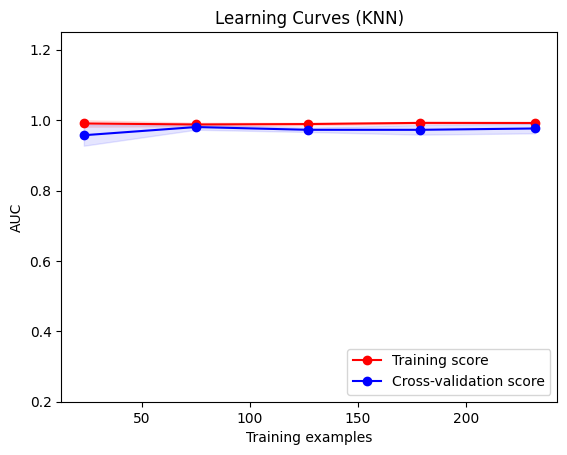

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define title for the plot
title = "Learning Curves (KNN)"

# Define cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Initialize the KNN model with optimal hyperparameters
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Adjust parameters if needed

# Plot the learning curve
plot_learning_curve(knn, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)

# Save the plots
plt.savefig('KNN_curve.pdf', transparent=True, dpi=300)
plt.savefig('KNN_curve.eps', transparent=True, dpi=300)

# Show the plot
plt.show()


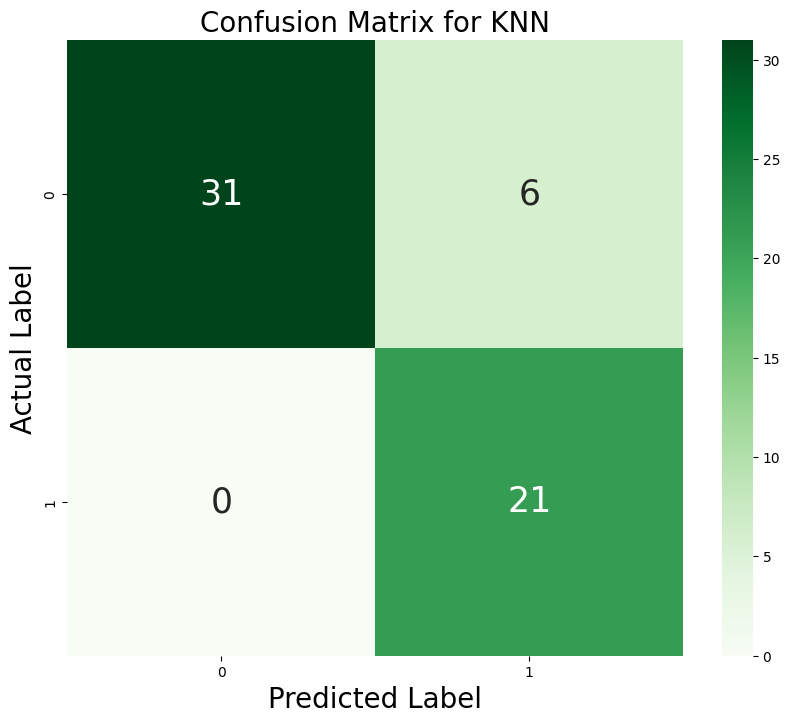

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the KNN model (if not already trained)
knn.fit(X_train, y_train)  # Ensure the model is trained

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})

# Formatting
plt.title('Confusion Matrix for KNN', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)

# Save the confusion matrix
plt.savefig('KNN_confusion.pdf', transparent=True, dpi=300)
plt.savefig('KNN_confusion.eps', transparent=True, dpi=300)

# Show plot
plt.show()


##SVM Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

C = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]

random_grid = {'C':C,
               'kernel':kernel,
               'degree':degree}
print(random_grid)

{'C': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc_randomcv=RandomizedSearchCV(estimator= svc, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
svc_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              20],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(svc_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.0051475 , 0.00595832, 0.00536671, 0.00567274, 0.00570831,
       0.00943789, 0.01008005, 0.00624356, 0.00767698, 0.00466318,
       0.00537009, 0.00448132, 0.00491934, 0.00794582, 0.00525045,
       0.00490704, 0.00431023, 0.00737104, 0.00427837, 0.00792842,
       0.00510764, 0.00450125, 0.00496578, 0.00465384, 0.00411654,
       0.00421515, 0.00747294, 0.00978394, 0.00428228, 0.01165285,
       0.00508351, 0.00545835, 0.00504756, 0.0043468 , 0.00447764,
       0.0074688 , 0.01068258, 0.00741858, 0.00504408, 0.00512371,
       0.00540218, 0.00545759, 0.00884686, 0.00476813, 0.01059103,
       0.00441594, 0.00524087, 0.00496912, 0.00426483, 0.00505204,
       0.00436349, 0.00742154, 0.00447965, 0.00573449, 0.00450749,
       0.00494952, 0.00749545, 0.00453963, 0.00425377, 0.00541625,
       0.00470319, 0.00487423, 0.01066971, 0.00501618, 0.00546184,
       0.00524654, 0.00752802, 0.00421166, 0.00859451, 0.00486755,
       0.00754571, 0.00507908

In [ ]:
print('\n Best estimator:')
print(svc_randomcv.best_estimator_)


 Best estimator:
SVC(C=13, kernel='linear')


In [ ]:
print('\n Best hyperparameters:')
print(svc_randomcv.best_params_)


 Best hyperparameters:
{'kernel': 'linear', 'degree': 3, 'C': 13}


In [ ]:
svc = SVC(kernel='linear',degree=3, C=13)
svc.fit(X_train,y_train)

SVC(C=13, kernel='linear')

In [ ]:
y_train_pred_svc = svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)
model_report(y_test, y_test_pred_svc)



=== Model Evaluation ===
Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
Specificity: 1.0000
F1 Score: 1.0000
AUC Score: 1.0000
Cohen’s Kappa: 1.0000
Log Loss: 0.0000



In [ ]:

# Calculate accuracy
train_acc_svc = accuracy_score(y_train, y_train_pred_svc)
test_acc_svc = accuracy_score(y_test, y_test_pred_svc)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_svc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_svc * 100:.2f}%")


Training Accuracy: 100.00%
Testing Accuracy: 100.00%


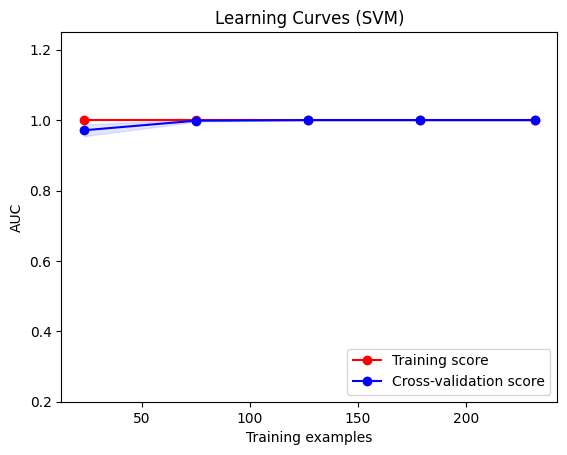

In [ ]:
title = "Learning Curves (SVM)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svc = SVC(kernel='linear',degree=3, C=13)                               # fill this in
plot_learning_curve(svc, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('SVM_curve.pdf', transparent=True, dpi=300)
plt.savefig('SVM_curve.eps', transparent=True, dpi=300)
plt.show()

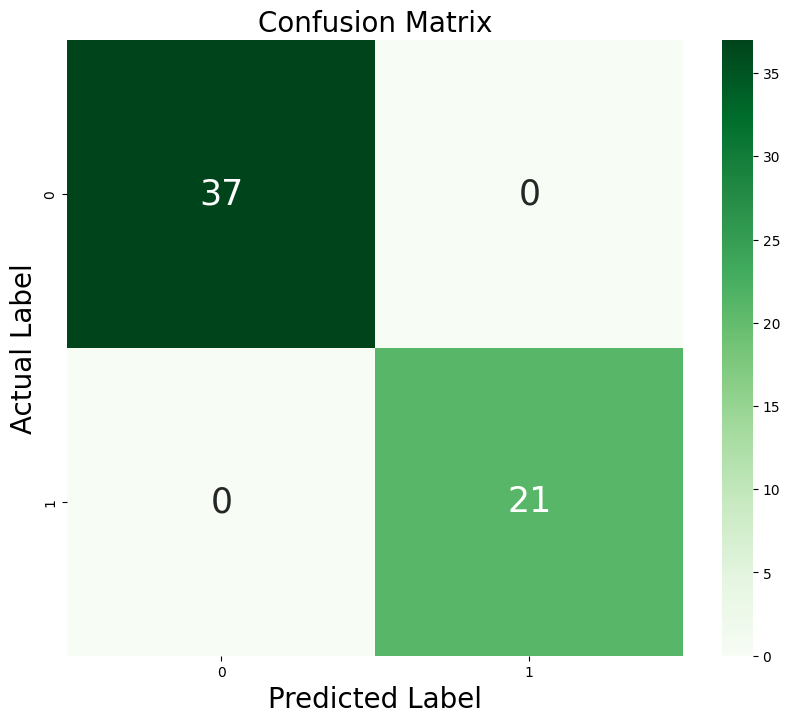

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('SVC_confusion.pdf', transparent=True, dpi=300)
plt.savefig('SVC_confusion.eps', transparent=True, dpi=300)

##Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
#criterion used in trees
criterion = ['entropy','gini']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100, n_jobs=-1)
#fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(rf_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([5.75540018e-01, 4.49327769e+00, 5.81061358e+00, 1.26438141e-03,
       5.11014843e-01, 1.93447099e+00, 5.92152076e+00, 1.27916336e-03,
       4.72171121e+00, 2.30775642e+00, 1.29718781e-03, 1.27291679e-03,
       1.00752187e+00, 1.28216743e-03, 1.00670629e+00, 1.26843452e-03,
       5.20070882e+00, 1.50055790e+00, 1.27382278e-03, 5.93729248e+00,
       5.02696896e-01, 1.90954208e-03, 4.65131092e+00, 1.29427910e-03,
       3.81736650e+00, 1.26910210e-03, 2.02616434e+00, 1.14756718e+00,
       2.76695309e+00, 5.85202551e-01, 1.57022476e-03, 2.08387933e+00,
       1.29714012e-03, 3.69043179e+00, 5.77169142e+00, 4.71097236e+00,
       1.28278732e-03, 4.43280225e+00, 4.97374535e-03, 7.61778913e+00,
       1.28183365e-03, 7.40565939e+00, 2.68700428e+00, 3.10559273e-03,
       1.46861076e-03, 2.38204002e-03, 2.15873232e+00, 4.36220841e+00,
       5.20577002e+00, 1.61487513e+00, 1.30505562e-03, 9.08302021e+00,
       4.96383228e+00, 1.89765854e+00, 4.523

In [ ]:
print('\n Best estimator:')
print(rf_randomcv.best_estimator_)


 Best estimator:
RandomForestClassifier(max_depth=10, min_samples_split=14, n_estimators=200)


In [ ]:
print('\n Best hyperparameters:')
print(rf_randomcv.best_params_)


 Best hyperparameters:
{'n_estimators': 200, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1600, min_samples_split = 2, min_samples_leaf = 1, max_features = 'log2', max_depth = 890, criterion = 'gini')
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=890, max_features='log2', n_estimators=1600)

In [ ]:
y_pred_rf = rf.predict(X_test)
model_report(y_test, y_pred_rf)


=== Model Evaluation ===
Accuracy: 0.9483
Precision: 0.8750
Recall (Sensitivity): 1.0000
Specificity: 0.9189
F1 Score: 0.9333
AUC Score: 0.9595
Cohen’s Kappa: 0.8914
Log Loss: 1.8643



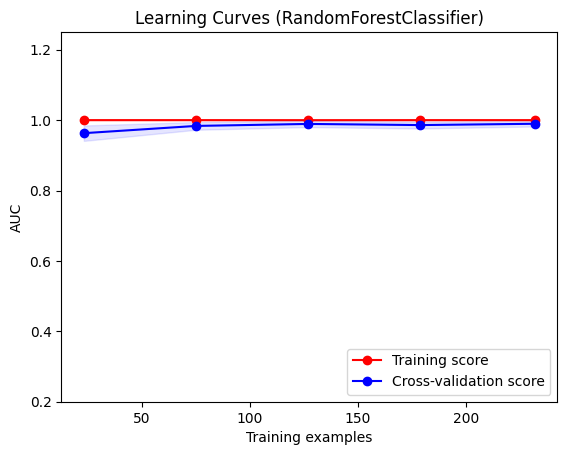

In [ ]:
title = "Learning Curves (RandomForestClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 1000, criterion = 'entropy')                             # fill this in
plot_learning_curve(rf, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('RF_curve.pdf', transparent=True, dpi=300)
plt.savefig('RF_curve.eps', transparent=True, dpi=300)
plt.show()

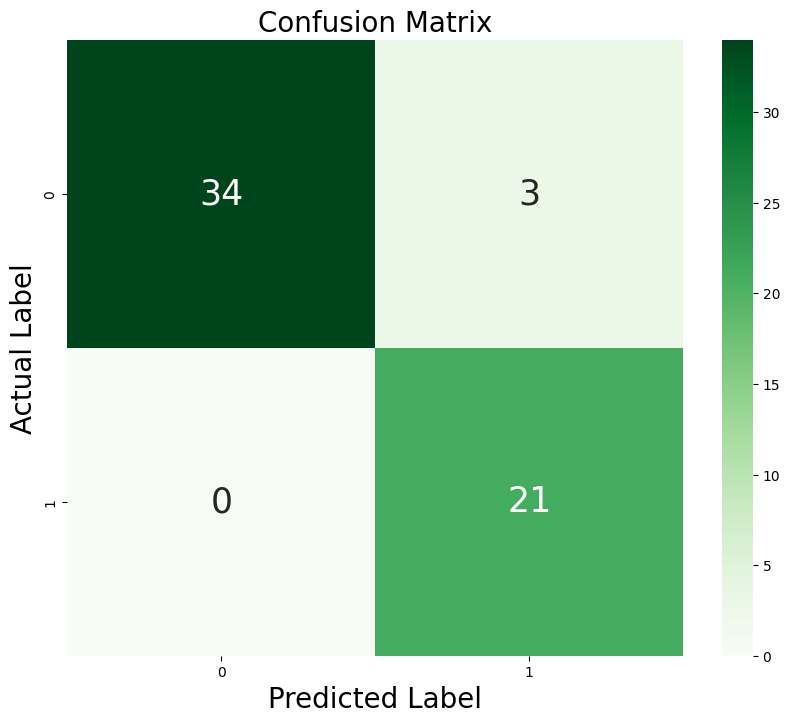

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('RF_confusion.pdf', transparent=True, dpi=300)
plt.savefig('RF_confusion.eps', transparent=True, dpi=300)

##DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_dict ={
             "criterion":['gini','entropy'],
             "max_depth":(150, 155, 160),
             "min_samples_split":range(1,10),
             "min_samples_leaf":range(1,5)
 }
lle
decision_tree = DecisionTreeClassifier(random_state=42)

dt_decision_tree=RandomizedSearchCV(estimator=decision_tree, param_distributions=param_dict, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
dt_decision_tree.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': (150, 155, 160),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10)},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(dt_decision_tree.cv_results_)


 All results:
{'mean_fit_time': array([0.00484428, 0.0046113 , 0.00424075, 0.00516777, 0.00564933,
       0.00436201, 0.00456138, 0.00410538, 0.00519094, 0.00407338,
       0.00468097, 0.00414877, 0.00405774, 0.00545321, 0.00405045,
       0.00406528, 0.00420036, 0.00099368, 0.00428605, 0.00564542,
       0.00429697, 0.00413051, 0.00504966, 0.0041698 , 0.00410972,
       0.00454531, 0.00512094, 0.00420036, 0.00436301, 0.00421991,
       0.00487437, 0.00096464, 0.00438809, 0.00428214, 0.00429826,
       0.00910993, 0.00411239, 0.0041739 , 0.00594425, 0.00500054,
       0.00408583, 0.00102086, 0.00453587, 0.00475063, 0.00411186,
       0.00411019, 0.00444331, 0.00435781, 0.00453219, 0.00436707,
       0.00394745, 0.00573401, 0.00458484, 0.00400052, 0.00097628,
       0.00154705, 0.00565515, 0.00561013, 0.00401888, 0.00646396,
       0.00637107, 0.00432162, 0.00420632, 0.00397525, 0.00279951,
       0.00471721, 0.00458431, 0.00458632, 0.00421529, 0.00408692,
       0.00442042, 0.00406156

In [ ]:
print('\n Best estimator:')
print(dt_decision_tree.best_estimator_)


 Best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=160, min_samples_split=5,
                       random_state=42)


In [ ]:
print('\n Best hyperparameters:')
print(dt_decision_tree.best_params_)


 Best hyperparameters:
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 160, 'criterion': 'entropy'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier(min_samples_split = 5, min_samples_leaf = 1, max_depth = 160, criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=160, min_samples_split=5)

In [ ]:
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)
model_report(y_test, y_test_pred_dt)


=== Model Evaluation ===
Accuracy: 0.9310
Precision: 0.8696
Recall (Sensitivity): 0.9524
Specificity: 0.9189
F1 Score: 0.9091
AUC Score: 0.9356
Cohen’s Kappa: 0.8537
Log Loss: 2.4858



In [ ]:
from sklearn.metrics import accuracy_score

# Use the best model found by RandomizedSearchCV
dt_best = dt_decision_tree.best_estimator_

# Ensure it's trained (this is redundant as RandomizedSearchCV already fits it, but done for safety)
dt_best.fit(X_train, y_train)

# Predictions
y_train_pred_dt = dt_best.predict(X_train)
y_test_pred_dt = dt_best.predict(X_test)

# Accuracy scores
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)

# Print results
print(f"Training Accuracy: {train_acc_dt * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_dt * 100:.2f}%")


Training Accuracy: 98.71%
Testing Accuracy: 93.10%


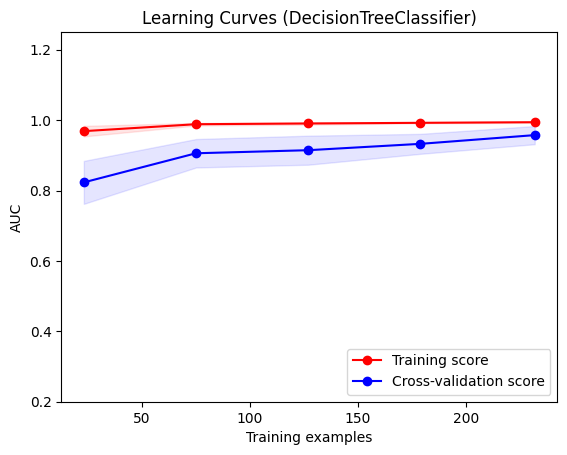

In [ ]:
title = "Learning Curves (DecisionTreeClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 3, max_depth = 160, criterion = 'gini')                             # fill this in
plot_learning_curve(dt, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('DT_curve.pdf', transparent=True, dpi=300)
plt.savefig('DT_curve.eps', transparent=True, dpi=300)
plt.show()

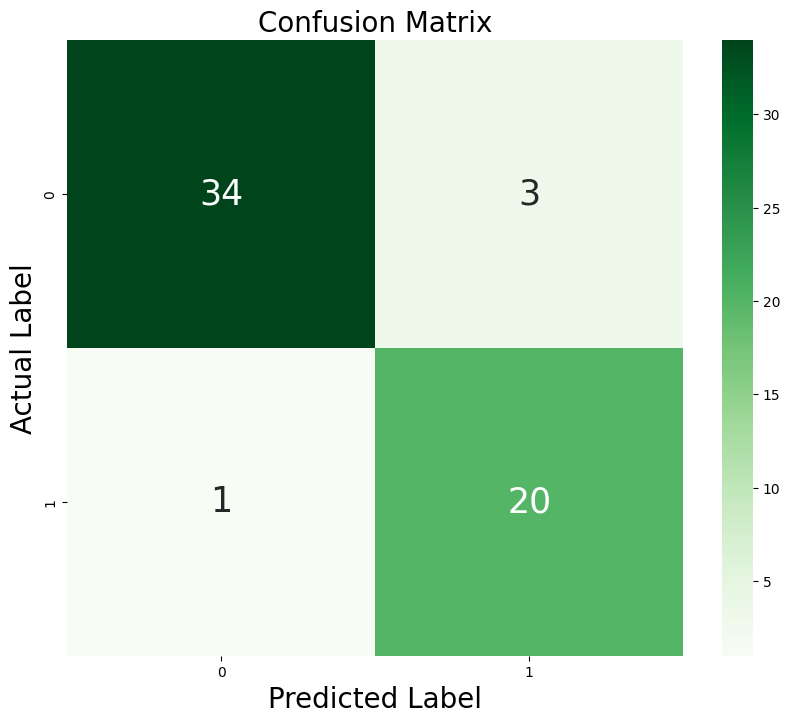

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('DT_confusion.pdf', transparent=True, dpi=300)
plt.savefig('DT_confusion.eps', transparent=True, dpi=300)

##XGBClassifier

In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define XGBoost classifier
estimator = XGBClassifier(objective='binary:logistic', nthread=4, seed=42)

# Define hyperparameter grid
parameters = {
    'max_depth': range(3, 10),  # Avoid depth=2 for better generalization
    'n_estimators': range(100, 300, 50),  # Increase range for more exploration
    'learning_rate': [0.01, 0.05, 0.1]
}

# Convert X_train to NumPy array before fitting
X_train_np = X_train.to_numpy()  # Convert to NumPy array

# Perform randomized search
xg_randomcv = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=True,
    n_iter=20  # Limit iterations for efficiency
)

# Fit the model using the NumPy array
xg_randomcv.fit(X_train_np, y_train_encoded)

# Print best parameters
print('\n Best hyperparameters:', xg_randomcv.best_params_)

# Train best model
best_params = xg_randomcv.best_params_
# Train best model with imbalance handling
xg = XGBClassifier(**best_params, scale_pos_weight=scale)
xg.fit(X_train_np, y_train_encoded)

# === Prediction & Evaluation ===

# Probabilistic predictions
y_proba_test = xg.predict_proba(X_test_np)[:, 1]
y_proba_train = xg.predict_proba(X_train_np)[:, 1]

# Custom thresholding at 0.3
y_pred_test_custom = (y_proba_test >= 0.3).astype(int)
y_pred_train_custom = (y_proba_train >= 0.3).astype(int)

# Accuracy with custom threshold
train_acc_xg = accuracy_score(y_train_encoded, y_pred_train_custom)
test_acc_xg = accuracy_score(y_test_encoded, y_pred_test_custom)

# Print Accuracies
print("\n=== XGBoost Model (with scale_pos_weight and threshold=0.3) ===")
print(f"Training Accuracy: {train_acc_xg * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_xg * 100:.2f}%\n")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best hyperparameters: {'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.1}

=== XGBoost Model (with scale_pos_weight and threshold=0.3) ===
Training Accuracy: 100.00%
Testing Accuracy: 94.83%



In [ ]:
from xgboost import XGBClassifier

# Compute class weight
neg, pos = np.bincount(y_train_encoded)
scale = neg / pos

xg = XGBClassifier(**best_params, scale_pos_weight=scale)
xg.fit(X_train_np, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# try 0.3, 0.4 instead of 0.5
model_reports(y_test_encoded, y_pred_custom)



=== Model Evaluation ===
Accuracy: 0.9483
Precision: 0.8750
Recall (Sensitivity): 1.0000
Specificity: 0.9189
F1 Score: 0.9333
AUC Score: 0.9595
Cohen’s Kappa: 0.8914
Log Loss: 1.8643



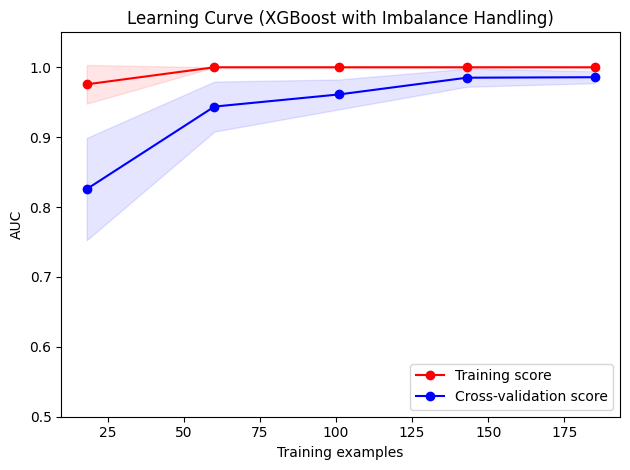

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
title = "Learning Curve (XGBoost with Imbalance Handling)"
plot_learning_curve(xg, title, X_train_np, y_train_encoded, ylim=(0.5, 1.05), cv=cv, n_jobs=-1)
plt.tight_layout()
plt.savefig('XGBoost_learning_curve.png', dpi=300)
plt.show()

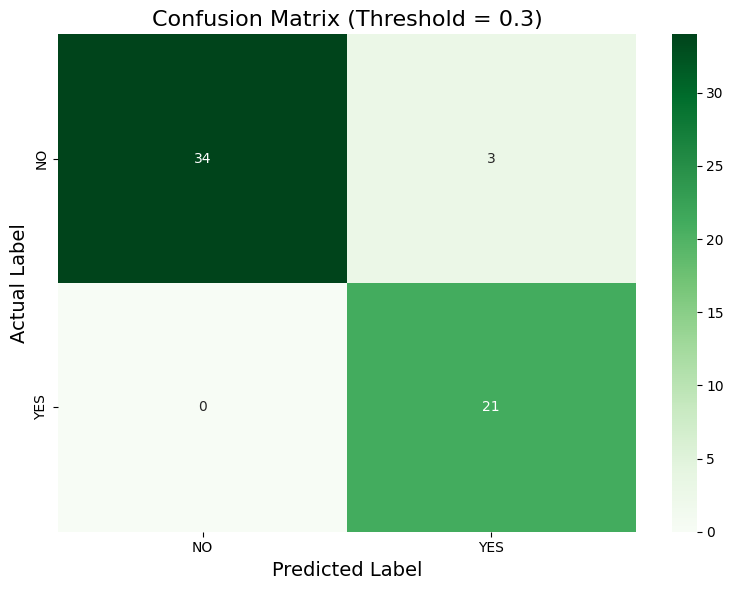

In [ ]:
cm = confusion_matrix(y_test_encoded, y_pred_test_custom)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("Actual Label", fontsize=14)
plt.title("Confusion Matrix (Threshold = 0.3)", fontsize=16)
plt.tight_layout()
plt.savefig('XGBoost_confusion_matrix.png', dpi=300)
plt.show()

In [ ]:
print('\n All results:')
print(xg_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.04394736, 0.06639566, 0.03520045, 0.05130005, 0.03113246,
       0.06550183, 0.04425449, 0.06798701, 0.06808472, 0.03730574,
       0.04484854, 0.04605269, 0.08157935, 0.07364717, 0.05934043,
       0.04130497, 0.03576646, 0.03630171, 0.03234696, 0.03364458]), 'std_fit_time': array([0.00159641, 0.00564842, 0.00121347, 0.00821524, 0.00041284,
       0.00257268, 0.00461245, 0.01370447, 0.00335134, 0.00056558,
       0.00071228, 0.0013799 , 0.00144352, 0.01130518, 0.00712526,
       0.0005008 , 0.00230695, 0.00223897, 0.00090084, 0.00357668]), 'mean_score_time': array([0.00626397, 0.00550914, 0.00537205, 0.00542231, 0.00517912,
       0.00692611, 0.00540333, 0.005585  , 0.00544734, 0.00560236,
       0.00528955, 0.0054708 , 0.00651608, 0.00633378, 0.00557508,
       0.00549235, 0.00525389, 0.00620093, 0.00523295, 0.00503874]), 'std_score_time': array([1.35316779e-03, 1.65912884e-04, 2.56110476e-04, 1.89863324e-04,
       1.32013416e-04, 3.24349959

In [ ]:
print('\n Best estimator:')
print(xg_randomcv.best_estimator_)


 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)


In [ ]:
print('\n Best hyperparameters:')
print(xg_randomcv.best_params_)


 Best hyperparameters:
{'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.1}


##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

grid_values = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Use solver compatible with both 'l1' and 'l2'
lr = LogisticRegression(random_state=42, solver='liblinear')

lr_randomcv = RandomizedSearchCV(lr, param_distributions=grid_values, cv=5)
lr_randomcv.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(random_state=42,
                                                solver='liblinear'),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [ ]:
print('\n All results:')
print(lr_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.02419977, 0.01454406, 0.00852752, 0.03377733, 0.0049355 ,
       0.00558457, 0.00684214, 0.00616407, 0.00690784, 0.00529022]), 'std_fit_time': array([0.01638528, 0.00498392, 0.0050039 , 0.01338767, 0.00030124,
       0.00128194, 0.00291665, 0.00091496, 0.00042639, 0.00053146]), 'mean_score_time': array([0.00543857, 0.00501995, 0.01284294, 0.00896707, 0.00321293,
       0.00330601, 0.00326109, 0.00322266, 0.00337567, 0.00413375]), 'std_score_time': array([4.12252985e-03, 2.92072977e-03, 1.19825448e-02, 6.91175229e-03,
       1.48174644e-04, 3.05851546e-05, 2.39802161e-04, 1.72769454e-04,
       1.72818154e-04, 1.89792080e-03]), 'param_penalty': masked_array(data=['l1', 'l1', 'l1', 'l1', 'l1', 'l2', 'l2', 'l2', 'l1',
                   'l2'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=np.str_('?'),
            dtype=object), 'param_C': masked_array(data=[0.001, 10

In [ ]:
print('\n Best estimator:')
print(lr_randomcv.best_estimator_)


 Best estimator:
LogisticRegression(C=1000, penalty='l1', random_state=42, solver='liblinear')


In [ ]:
print('\n Best hyperparameters:')
print(lr_randomcv.best_params_)


 Best hyperparameters:
{'penalty': 'l1', 'C': 1000}


In [ ]:
from sklearn.linear_model import LogisticRegression

# Use solver='liblinear' or 'saga' for l1
lr = LogisticRegression(penalty='l1', C=1000, solver='liblinear', random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(C=1000, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
y_test_pred_lr = lr.predict(X_test)
model_report(y_test, y_pred_lr)


=== Model Evaluation ===
Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
Specificity: 1.0000
F1 Score: 1.0000
AUC Score: 1.0000
Cohen’s Kappa: 1.0000
Log Loss: 0.0000



In [ ]:
from sklearn.metrics import accuracy_score
# Create and train the model
lr = LogisticRegression(penalty='l2', C=1000)
lr.fit(X_train, y_train)  # This line is crucial and was likely missing

# Predict on training data
y_train_pred_lr = lr.predict(X_train)

# Predict on testing data
y_test_pred_lr = lr.predict(X_test)

# Compute accuracy
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_pred_lr)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_lr * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_lr * 100:.2f}%")


Training Accuracy: 100.00%
Testing Accuracy: 100.00%


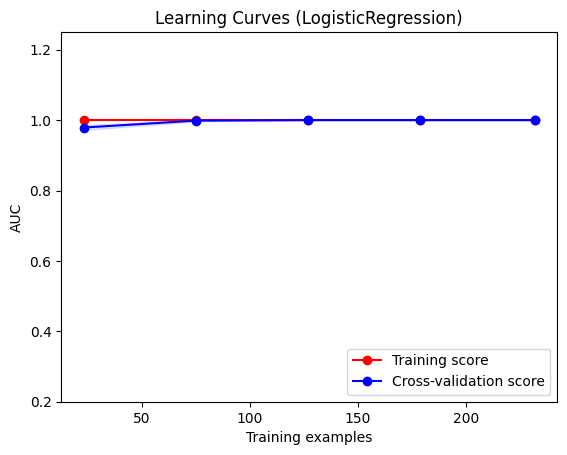

In [ ]:
title = "Learning Curves (LogisticRegression)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
lr = LogisticRegression(penalty = 'l2', C = 1000)                            # fill this in
plot_learning_curve(lr, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('LR_curve.pdf', transparent=True, dpi=300)
plt.savefig('LR_curve.eps', transparent=True, dpi=300)
plt.show()

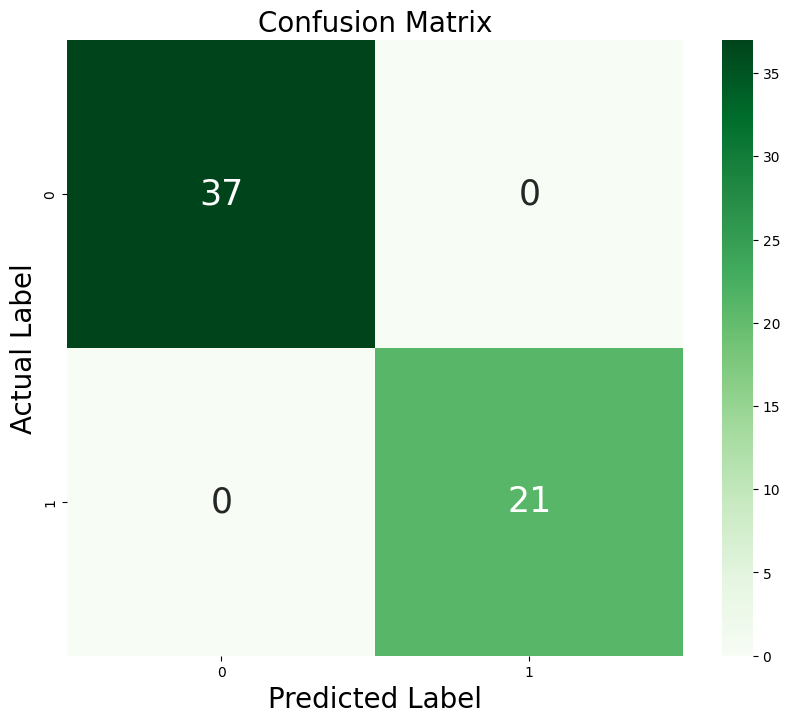

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('LR_confusion.pdf', transparent=True, dpi=300)
plt.savefig('LR_confusion.eps', transparent=True, dpi=300)

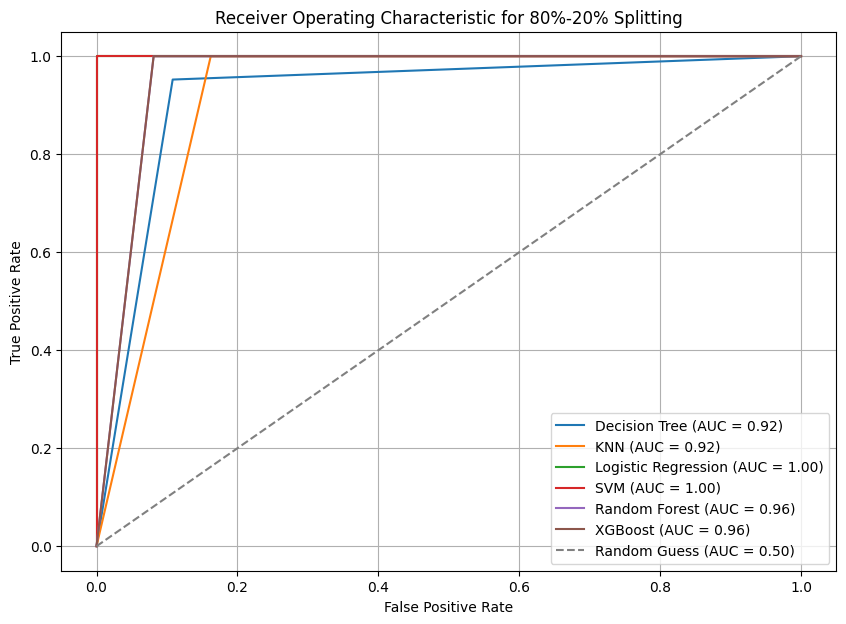

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Encode y_test ('YES' -> 1, 'NO' -> 0)
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Ensure all predictions are encoded to match (0 or 1)
y_pred_dt_encoded = np.where(y_pred_dt == 'YES', 1, 0)
y_pred_knn_encoded = np.where(y_pred_knn == 'YES', 1, 0)
y_pred_LR_encoded = np.where(y_pred_lr == 'YES', 1, 0)
y_pred_svc_encoded = np.where(y_pred_svc == 'YES', 1, 0)
y_pred_rf_encoded = np.where(y_pred_rf == 'YES', 1, 0)
y_pred_xg_encoded = np.where(y_pred_xg == 'YES', 1, 0)

# Compute ROC curves and AUC scores
models = {
    "Decision Tree": y_pred_dt_encoded,
    "KNN": y_pred_knn_encoded,
    "Logistic Regression": y_pred_LR_encoded,
    "SVM": y_pred_svc_encoded,
    "Random Forest": y_pred_rf_encoded,
    "XGBoost": y_pred_test_custom
}

plt.figure(figsize=(10, 7))

for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot Random Guess (Baseline)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess (AUC = 0.50)")

# Formatting the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for 80%-20% Splitting")
plt.legend(loc="lower right")
plt.grid()

# Save the figure
plt.savefig('all_roc.pdf', transparent=True, dpi=300)
plt.savefig('all_roc.eps', transparent=True, dpi=300)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, cohen_kappa_score, log_loss, roc_curve, confusion_matrix
)
from sklearn.preprocessing import LabelEncoder

# Encode the original string labels to 0/1
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Encode predicted labels (ensure all are strings before transforming)
y_test_pred_dt_encoded = le.transform(y_test_pred_dt)
y_test_pred_knn_encoded = le.transform(y_test_pred_knn)
y_pred_lr_encoded = le.transform(y_pred_lr)
y_test_pred_svc_encoded = le.transform(y_test_pred_svc)
y_pred_rf_encoded = le.transform(y_pred_rf)
# y_pred_custom from XGBoost is already in binary (0/1) form

# Initialize list to store model metrics
model_metrics = []

def model_report(model_name, y_true, y_pred):
    """
    Computes classification metrics for a given model and appends results to a list in percentage format.
    """
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    auc = roc_auc_score(y_true, y_pred) * 100

    # Confusion matrix components
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = (tn / (tn + fp)) * 100 if (tn + fp) != 0 else 0

    # AUC, Kappa, Log Loss
    kappa = cohen_kappa_score(y_true, y_pred) * 100
    logloss = log_loss(y_true, y_pred)

    # Append to list
    model_metrics.append({
        "Model": model_name,
        "Accuracy (%)": round(accuracy, 2),
        "Precision (%)": round(precision, 2),
        "Recall (%)": round(recall, 2),
        "Specificity (%)": round(specificity, 2),
        "F1 Score (%)": round(f1, 2),
        "AUC Score (%)": round(auc, 2),
        "Kappa Score (%)": round(kappa, 2),
        "Log Loss": round(logloss, 4)
    })

# ==== Call report for each model ====
model_report("Decision Tree", y_test_encoded, y_test_pred_dt_encoded)
model_report("KNN", y_test_encoded, y_test_pred_knn_encoded)
model_report("Logistic Regression", y_test_encoded, y_pred_lr_encoded)
model_report("SVM", y_test_encoded, y_test_pred_svc_encoded)
model_report("Random Forest", y_test_encoded, y_pred_rf_encoded)
model_report("XGBoost", y_test_encoded, y_pred_custom)  # Already binary

# Convert to DataFrame for display
df_metrics = pd.DataFrame(model_metrics)

# Print results
print(df_metrics)


                 Model  Accuracy (%)  Precision (%)  Recall (%)  \
0        Decision Tree         93.10          86.96       95.24   
1                  KNN         96.55          91.30      100.00   
2  Logistic Regression        100.00         100.00      100.00   
3                  SVM        100.00         100.00      100.00   
4        Random Forest         94.83          87.50      100.00   
5              XGBoost         94.83          87.50      100.00   

   Specificity (%)  F1 Score (%)  AUC Score (%)  Kappa Score (%)  Log Loss  
0            91.89         90.91          93.56            85.37    2.4858  
1            94.59         95.45          97.30            92.69    1.2429  
2           100.00        100.00         100.00           100.00    0.0000  
3           100.00        100.00         100.00           100.00    0.0000  
4            91.89         93.33          95.95            89.14    1.8643  
5            91.89         93.33          95.95            89.14    

TESTING FOR DIFFERENT COMBINATIONS

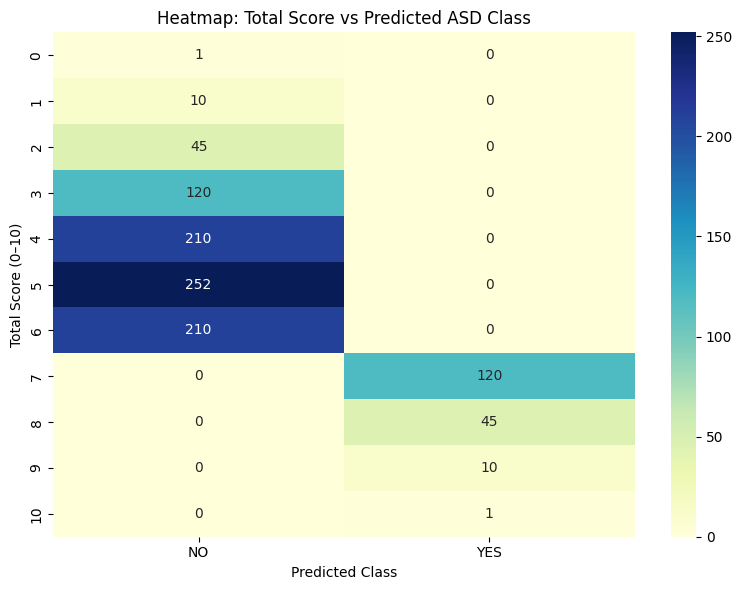

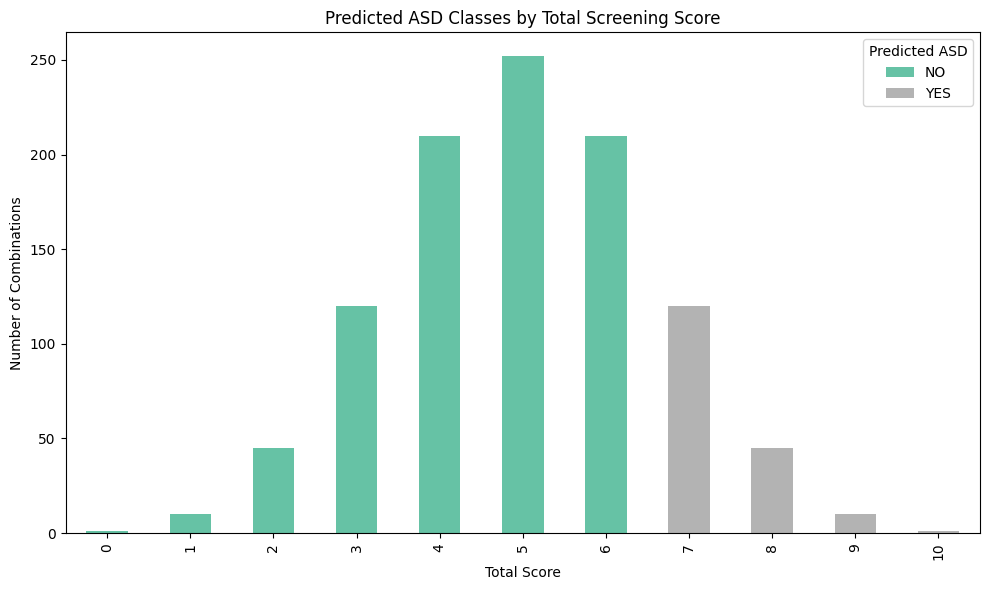

    A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0          0         0         0         0         0         0         0   
1          0         0         0         0         0         0         0   
2          0         0         0         0         0         0         0   
3          0         0         0         0         0         0         0   
4          0         0         0         0         0         0         0   
5          0         0         0         0         0         0         0   
6          0         0         0         0         0         0         0   
7          0         0         0         0         0         0         0   
8          0         0         0         0         0         0         1   
9          0         0         0         0         0         0         1   
10         0         0         0         0         0         0         1   
11         0         0         0         0         0         0         1   
12         0

In [ ]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # or use SVC
from sklearn.metrics import accuracy_score
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- STEP 1: Load and prepare training data ----------
# Assume 'ch' is already defined as your full original dataset
df = ch.copy()

# Drop irrelevant/leakage columns
df = df.drop(columns=['result'], errors='ignore')

# Encode target
label_encoder = LabelEncoder()
df['Class/ASD'] = label_encoder.fit_transform(df['Class/ASD'])  # YES=1, NO=0

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Features and target
selected_features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                     'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
X = df[selected_features]
y = df['Class/ASD']

# ---------- STEP 2: Train model ----------
model = SVC(kernel='linear', degree=3, C=13, probability=True)
model.fit(X, y)

# ---------- STEP 3: Generate all 2^10 = 1024 combinations ----------
binary_combos = list(product([0, 1], repeat=10))
test_df = pd.DataFrame(binary_combos, columns=selected_features)

# ---------- STEP 4: Predict on all combinations ----------
# *** The fix: Create a copy of test_df for prediction ***
test_df_for_prob = test_df.copy()
test_df['Predicted_Label'] = model.predict(test_df_for_prob)
test_df['Predicted_Prob'] = model.predict_proba(test_df_for_prob)[:, 1]
test_df['Predicted_ASD'] = label_encoder.inverse_transform(test_df['Predicted_Label'])
test_df['Total_Score'] = test_df[selected_features].sum(axis=1)

# ---------- STEP 5: Visualize as heatmap ----------
pivot = test_df.pivot_table(index='Total_Score', columns='Predicted_ASD', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Total Score vs Predicted ASD Class")
plt.xlabel("Predicted Class")
plt.ylabel("Total Score (0–10)")
plt.tight_layout()
plt.show()

# ---------- STEP 6: Visualize as bar plot ----------
score_dist = test_df.groupby(['Total_Score', 'Predicted_ASD']).size().unstack().fillna(0)
score_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Predicted ASD Classes by Total Screening Score")
plt.xlabel("Total Score")
plt.ylabel("Number of Combinations")
plt.legend(title="Predicted ASD")
plt.tight_layout()
plt.show()

# ---------- STEP 7: Show and optionally save ----------
print(test_df.head(15))
test_df.to_csv("all_ASD_question_combinations_predictions.csv", index=False)

# ---------- STEP 8: Calculate accuracy of threshold behavior ----------
# Since no ground truth exists, you can define a threshold (e.g., Total_Score >= 7 means ASD)
test_df['Expected_Label'] = np.where(test_df['Total_Score'] >= 7, 1, 0)
acc = accuracy_score(test_df['Expected_Label'], test_df['Predicted_Label'])
print(f"Model accuracy on all 1024 combinations : {acc * 100:.2f}%")

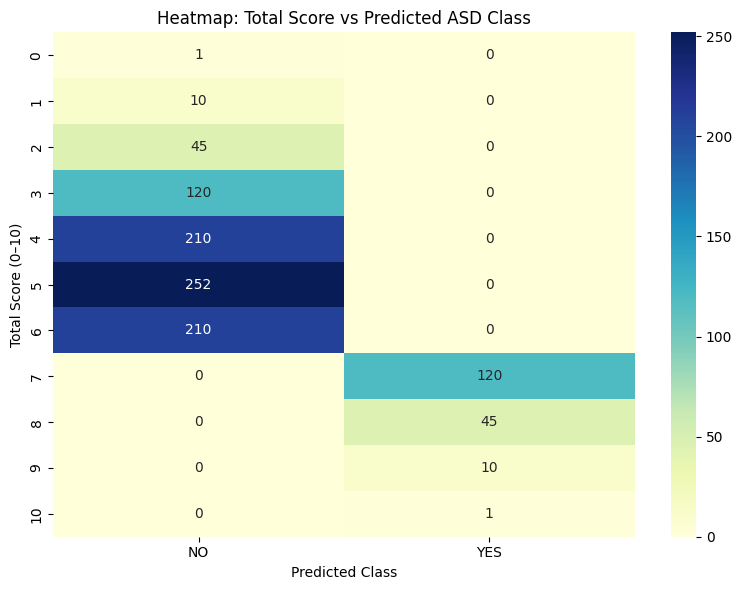

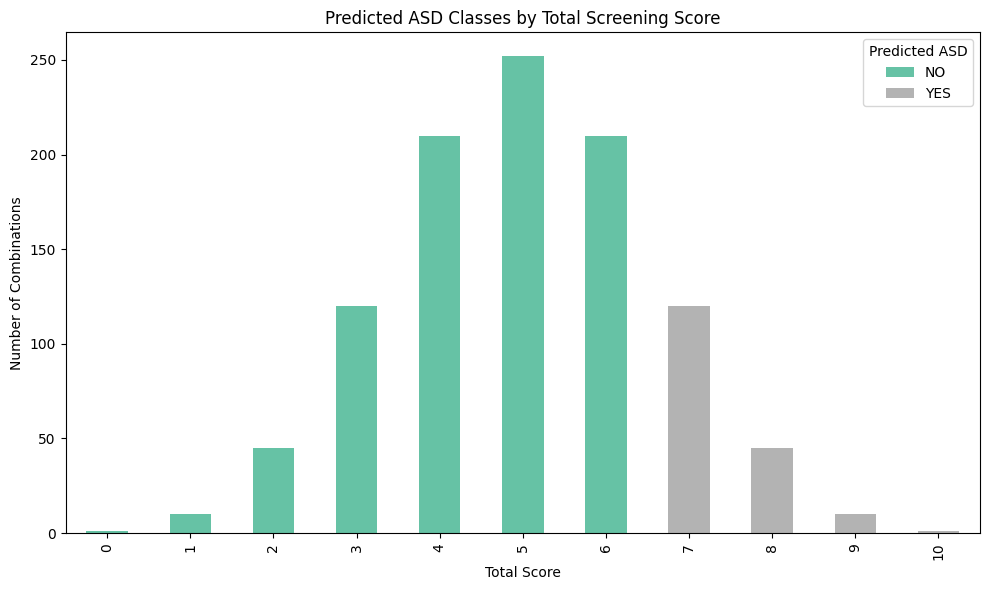

    A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0          0         0         0         0         0         0         0   
1          0         0         0         0         0         0         0   
2          0         0         0         0         0         0         0   
3          0         0         0         0         0         0         0   
4          0         0         0         0         0         0         0   
5          0         0         0         0         0         0         0   
6          0         0         0         0         0         0         0   
7          0         0         0         0         0         0         0   
8          0         0         0         0         0         0         1   
9          0         0         0         0         0         0         1   
10         0         0         0         0         0         0         1   
11         0         0         0         0         0         0         1   
12         0

In [ ]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # or use SVC
from sklearn.metrics import accuracy_score
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- STEP 1: Load and prepare training data ----------
# Assume 'ch' is already defined as your full original dataset
df = ch.copy()

# Drop irrelevant/leakage columns
df = df.drop(columns=['result'], errors='ignore')

# Encode target
label_encoder = LabelEncoder()
df['Class/ASD'] = label_encoder.fit_transform(df['Class/ASD'])  # YES=1, NO=0

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Features and target
selected_features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                     'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
X = df[selected_features]
y = df['Class/ASD']

# ---------- STEP 2: Train model ----------
model = LogisticRegression(penalty='l1', C=1000, solver='liblinear', random_state=42)
model.fit(X, y)

# ---------- STEP 3: Generate all 2^10 = 1024 combinations ----------
binary_combos = list(product([0, 1], repeat=10))
test_df = pd.DataFrame(binary_combos, columns=selected_features)

# ---------- STEP 4: Predict on all combinations ----------
# *** The fix: Create a copy of test_df for prediction ***
test_df_for_prob = test_df.copy()
test_df['Predicted_Label'] = model.predict(test_df_for_prob)
test_df['Predicted_Prob'] = model.predict_proba(test_df_for_prob)[:, 1]
test_df['Predicted_ASD'] = label_encoder.inverse_transform(test_df['Predicted_Label'])
test_df['Total_Score'] = test_df[selected_features].sum(axis=1)

# ---------- STEP 5: Visualize as heatmap ----------
pivot = test_df.pivot_table(index='Total_Score', columns='Predicted_ASD', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Total Score vs Predicted ASD Class")
plt.xlabel("Predicted Class")
plt.ylabel("Total Score (0–10)")
plt.tight_layout()
plt.show()

# ---------- STEP 6: Visualize as bar plot ----------
score_dist = test_df.groupby(['Total_Score', 'Predicted_ASD']).size().unstack().fillna(0)
score_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Predicted ASD Classes by Total Screening Score")
plt.xlabel("Total Score")
plt.ylabel("Number of Combinations")
plt.legend(title="Predicted ASD")
plt.tight_layout()
plt.show()

# ---------- STEP 7: Show and optionally save ----------
print(test_df.head(15))
test_df.to_csv("all_ASD_question_combinations_predictions.csv", index=False)

# ---------- STEP 8: Calculate accuracy of threshold behavior ----------
# Since no ground truth exists, you can define a threshold (e.g., Total_Score >= 7 means ASD)
test_df['Expected_Label'] = np.where(test_df['Total_Score'] >= 7, 1, 0)
acc = accuracy_score(test_df['Expected_Label'], test_df['Predicted_Label'])
print(f"Model accuracy on all 1024 combinations : {acc * 100:.2f}%")